In [7]:
import numpy as np
import pandas as pd
from pathlib import Path
import sys
from statannot.statannot import add_stat_annotation

import matplotlib.pyplot as plt
import seaborn as sbn

dir_path = '/home/nnieto/Nico/Harmonization/harmonize_project/3_check_results/'
__file__ = dir_path+'plot_NM.py'
to_append = Path(__file__).resolve().parent.parent.as_posix()
sys.path.append(to_append)

from lib.utils import extract_experiment_data # noqa
from lib.utils import table_generation # noqa

# DATASETS: eNKI, 1000brains, CamCAN, AOMIC-ID1000. PRED: RVR, STACK: RF.
# Separed site analysis

Text(0.5, 1.0, 'Method: None')

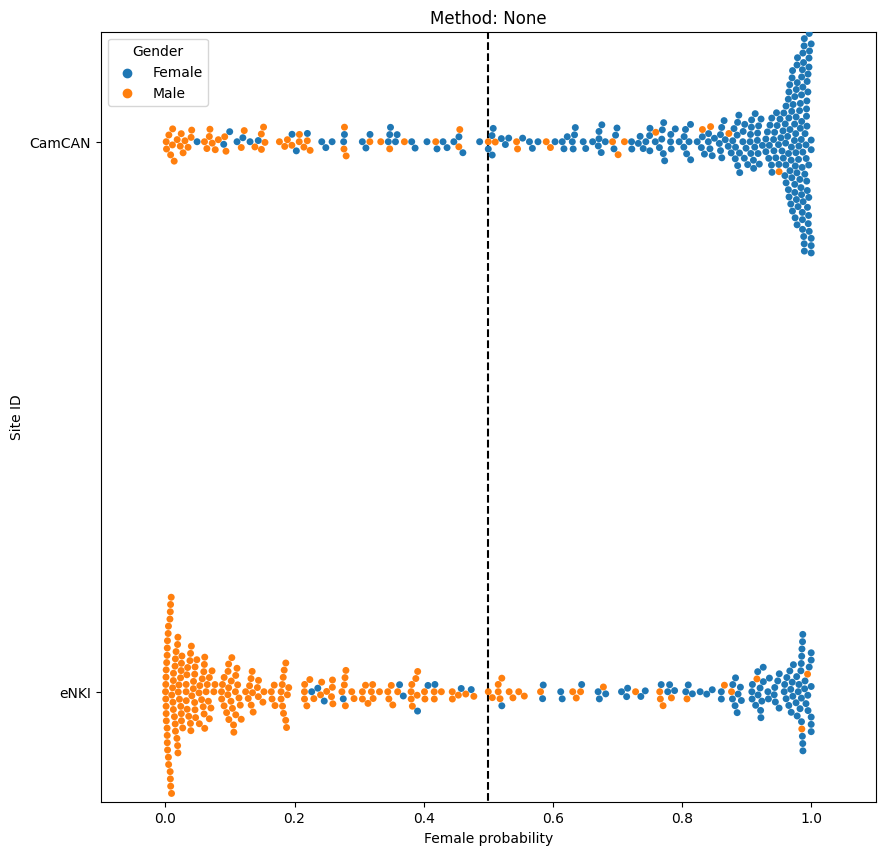

In [25]:
data_dir = "/home/nnieto/Nico/Harmonization/results_classification/test_classification_separated_genders_logit_stack_gssvm_pred_5repetitions/"

resutls = pd.read_csv(data_dir + "cheat_fold_0_of_5_out.csv",
                      sep=";")

resutls.rename(columns={"y_true": "Gender", "y_pred": "Female probability",
                        "site": "Site ID"},
               inplace=True)
resutls["Gender"].replace({0: "Male", 1: "Female"},
                          inplace=True)

fig, ax = plt.subplots(1, 1, figsize=[10, 10])
sbn.swarmplot(data=resutls, y="Site ID", x="Female probability", hue="Gender",
              ax=ax)
plt.xlim([-0.1,1.1])
plt.ylim([-0.2,1.2])

ax.vlines(x=0.5, ymin=-0.5, ymax=1.5, colors="black", linestyles="dashed")
plt.title("Method: None")

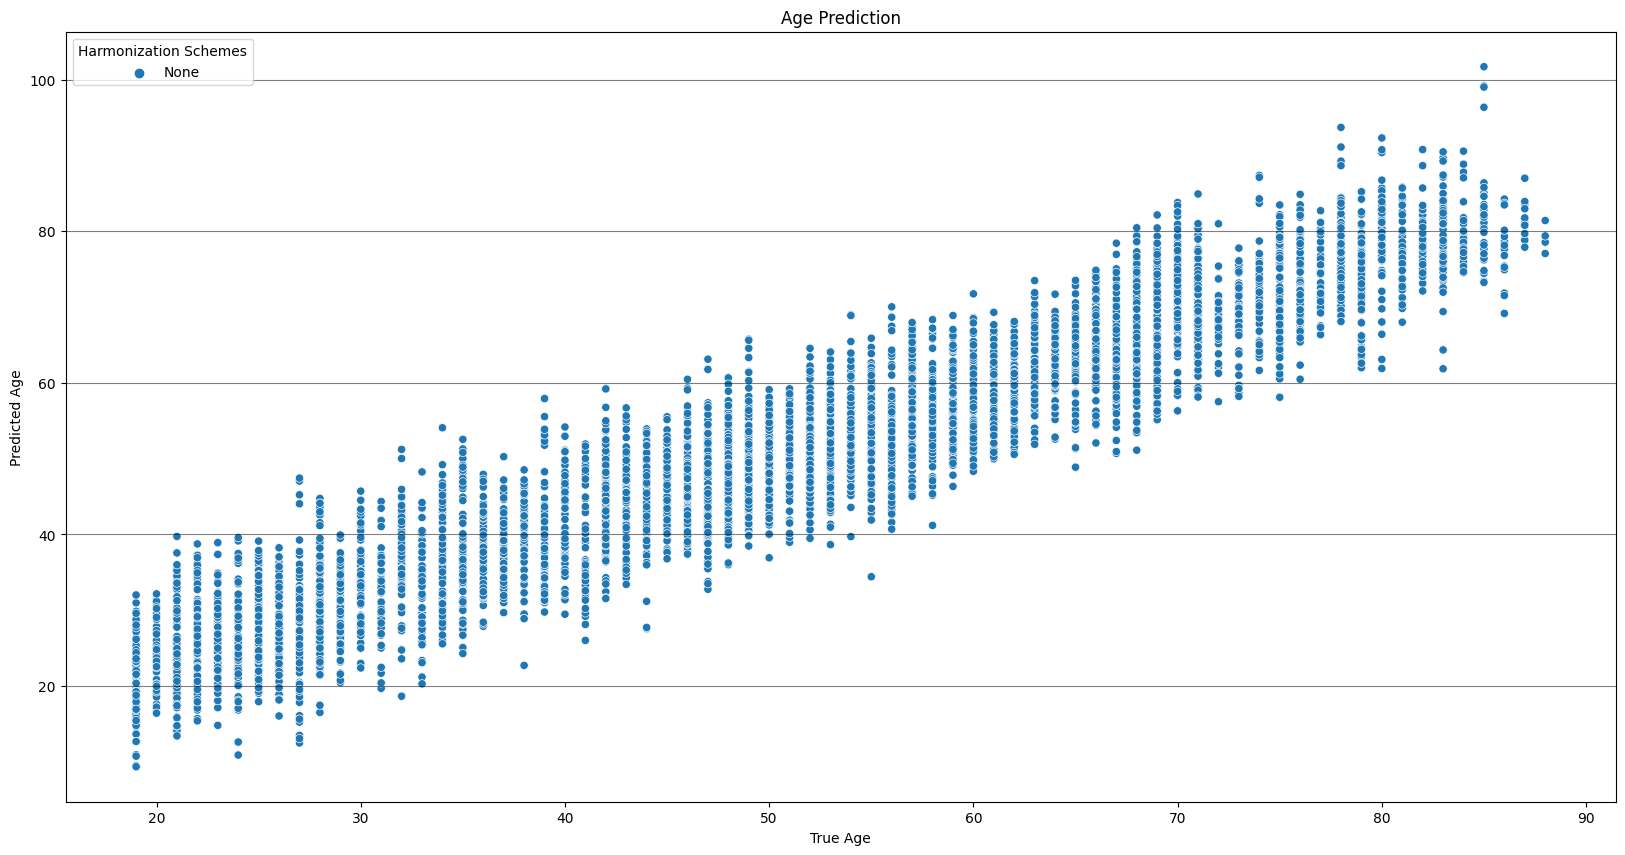

In [11]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_regression/"
experiments_to_check = {'test_regression_multiples_pipelines_rf_stack_rvr_pred_CamCAN_CAT_eNKI_FSL'}
data = extract_experiment_data(exp_dir, experiments_to_check, train_acc=True)
data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                       "target": "Leakage",
                                       "none": "None",
                                       "cheat": "Cheat",
                                       "notarget": "No Target"}, inplace=True)

harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]
data = data[data["Harmonization Schemes"].isin(harm_modes)]
absolute = False

if absolute:
    data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])
else:
    data["y_diff"] = data["y_true"]-data["y_pred"]

fig, ax = plt.subplots(1, 1, figsize=[20, 10])
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

harm_to_plot = 'None'

data_to_plot = data[data["Harmonization Schemes"] == harm_to_plot]

sbn.scatterplot(
    data=data_to_plot,
    x="y_true", y="y_pred", hue="Harmonization Schemes",
)
plt.ylabel("Predicted Age")
plt.title("Age Prediction")
plt.xlabel("True Age")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()





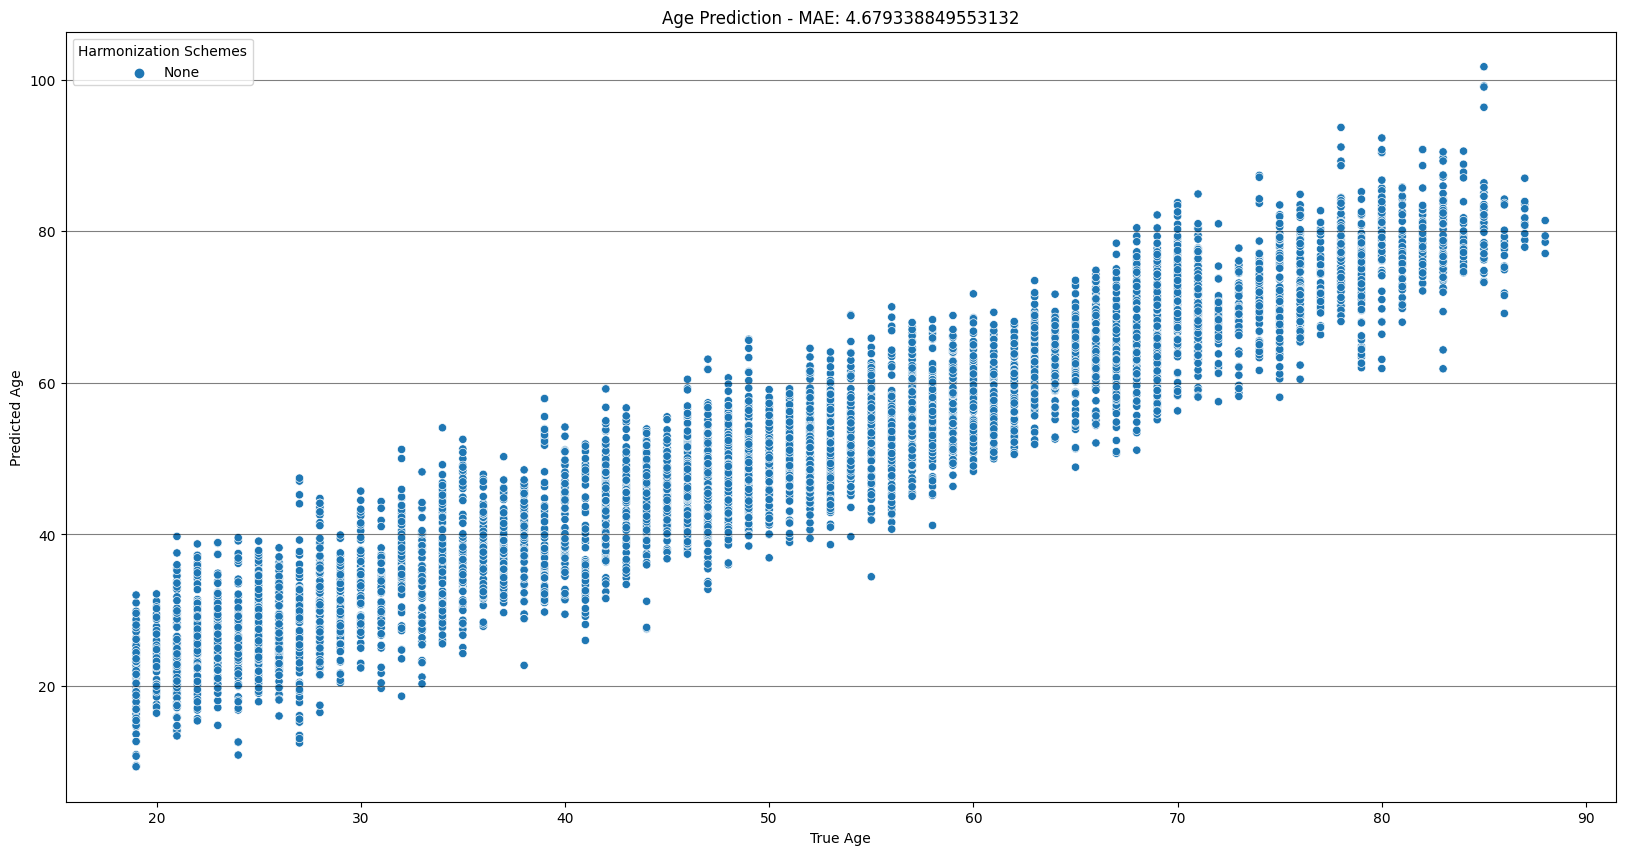

In [15]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_regression/"
experiments_to_check = {'test_regression_multiples_pipelines_rf_stack_rvr_pred_CamCAN_CAT_eNKI_FSL'}
data = extract_experiment_data(exp_dir, experiments_to_check, train_acc=True)
data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                       "target": "Leakage",
                                       "none": "None",
                                       "cheat": "Cheat",
                                       "notarget": "No Target"}, inplace=True)

harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]
data = data[data["Harmonization Schemes"].isin(harm_modes)]
absolute = False

if absolute:
    data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])
else:
    data["y_diff"] = data["y_true"]-data["y_pred"]

fig, ax = plt.subplots(1, 1, figsize=[20, 10])
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

harm_to_plot = 'None'

data_to_plot = data[data["Harmonization Schemes"] == harm_to_plot]

sbn.scatterplot(
    data=data_to_plot,
    x="y_true", y="y_pred", hue="Harmonization Schemes",
)
plt.ylabel("Predicted Age")
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(data_to_plot["y_true"],data_to_plot["y_pred"])
plt.title("Age Prediction - MAE: " + str(MAE))
plt.xlabel("True Age")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()



